# Utilização do PyQGIS no Jupyter

### Webografia
* https://lerryws.xyz/posts/PyQGIS-in-Jupyter-Notebook
* https://github.com/3liz/qgis-nbextension/blob/master/examples/render_layer.py
* https://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/

### Primeiro ensaio
Os paths específicos da versão de desenvolvimento instalada no meu computador.

In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/Claudia/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/Claudia/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [2]:
covid_gpkg = "covid-pt-2020-03-31.gpkg|layername=concelho"
vlayer = QgsVectorLayer(covid_gpkg, "Concelhos", "ogr")
if not vlayer.isValid():
    print("Layer failed to load!")
else:
    QgsProject.instance().addMapLayer(vlayer)
    print("Layer loaded")

Layer loaded


In [3]:
covid_gpkg = "covid-pt-2020-03-31.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer concelho loaded
Layer raa_central_concelho loaded
Layer raa_ocidental_concelho loaded
Layer raa_oriental_concelho loaded
Layer ram_concelho loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer situacao_epidemiologica loaded


In [4]:
concelho = QgsProject.instance().mapLayersByName('concelho')[0]

In [5]:
for c in concelho.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_03/04/2020"]))

Em ÁGUEDA há NULL caso(s) confirmados
Em ALBERGARIA-A-VELHA há NULL caso(s) confirmados
Em ANADIA há NULL caso(s) confirmados
Em AROUCA há NULL caso(s) confirmados
Em AVEIRO há NULL caso(s) confirmados
Em CASTELO DE PAIVA há NULL caso(s) confirmados
Em ESPINHO há NULL caso(s) confirmados
Em ESTARREJA há NULL caso(s) confirmados
Em SANTA MARIA DA FEIRA há NULL caso(s) confirmados
Em ÍLHAVO há NULL caso(s) confirmados
Em MEALHADA há NULL caso(s) confirmados
Em MURTOSA há NULL caso(s) confirmados
Em OLIVEIRA DE AZEMÉIS há NULL caso(s) confirmados
Em OLIVEIRA DO BAIRRO há NULL caso(s) confirmados
Em OVAR há NULL caso(s) confirmados
Em SÃO JOÃO DA MADEIRA há NULL caso(s) confirmados
Em SEVER DO VOUGA há NULL caso(s) confirmados
Em VAGOS há NULL caso(s) confirmados
Em VALE DE CAMBRA há NULL caso(s) confirmados
Em ALJUSTREL há NULL caso(s) confirmados
Em ALMODÔVAR há NULL caso(s) confirmados
Em ALVITO há NULL caso(s) confirmados
Em BARRANCOS há NULL caso(s) confirmados
Em BEJA há NULL caso(s)

In [6]:
expr_sem_casos = QgsExpression( " \"confirmados_concelho_03/04/2020\" IS NULL " )
virgens = list(concelho.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
for c in virgens:
        print("Em {} não há pelos menos 3 casos confirmados".format(c["concelho"]))

Em ÁGUEDA não há pelos menos 3 casos confirmados
Em ALBERGARIA-A-VELHA não há pelos menos 3 casos confirmados
Em ANADIA não há pelos menos 3 casos confirmados
Em AROUCA não há pelos menos 3 casos confirmados
Em AVEIRO não há pelos menos 3 casos confirmados
Em CASTELO DE PAIVA não há pelos menos 3 casos confirmados
Em ESPINHO não há pelos menos 3 casos confirmados
Em ESTARREJA não há pelos menos 3 casos confirmados
Em SANTA MARIA DA FEIRA não há pelos menos 3 casos confirmados
Em ÍLHAVO não há pelos menos 3 casos confirmados
Em MEALHADA não há pelos menos 3 casos confirmados
Em MURTOSA não há pelos menos 3 casos confirmados
Em OLIVEIRA DE AZEMÉIS não há pelos menos 3 casos confirmados
Em OLIVEIRA DO BAIRRO não há pelos menos 3 casos confirmados
Em OVAR não há pelos menos 3 casos confirmados
Em SÃO JOÃO DA MADEIRA não há pelos menos 3 casos confirmados
Em SEVER DO VOUGA não há pelos menos 3 casos confirmados
Em VAGOS não há pelos menos 3 casos confirmados
Em VALE DE CAMBRA não há pelos m

In [7]:
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

In [8]:
xt = concelho.extent()
# print(xt)
width  = 200
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 200 por 409


In [9]:
from IPython.display import Image

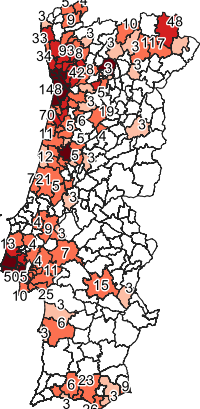

In [10]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [ ]:
qgs.exitQgis()